In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

In [2]:
print(tf.__version__)

2.5.0


In [3]:
dataset = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
x_train.dtype #unsigned integer (ranges between 0 to 255)

dtype('uint8')

In [8]:
x_valid, x_train_ = x_train[:5000]/255., x_train[5000:]/255.

In [9]:
y_valid, y_train_ = y_train[:5000], y_train[5000:]

In [41]:
x_test = x_test / 255.

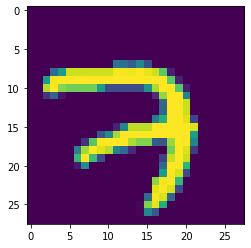

In [10]:
plt.imshow(x_train_[0])

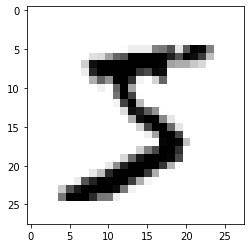

In [11]:
plt.imshow(x_train[0], cmap = "binary")

(-0.5, 27.5, 27.5, -0.5)

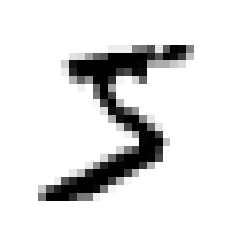

In [12]:
plt.imshow(x_train[0], cmap = "binary")
plt.axis("off") 

<AxesSubplot:>

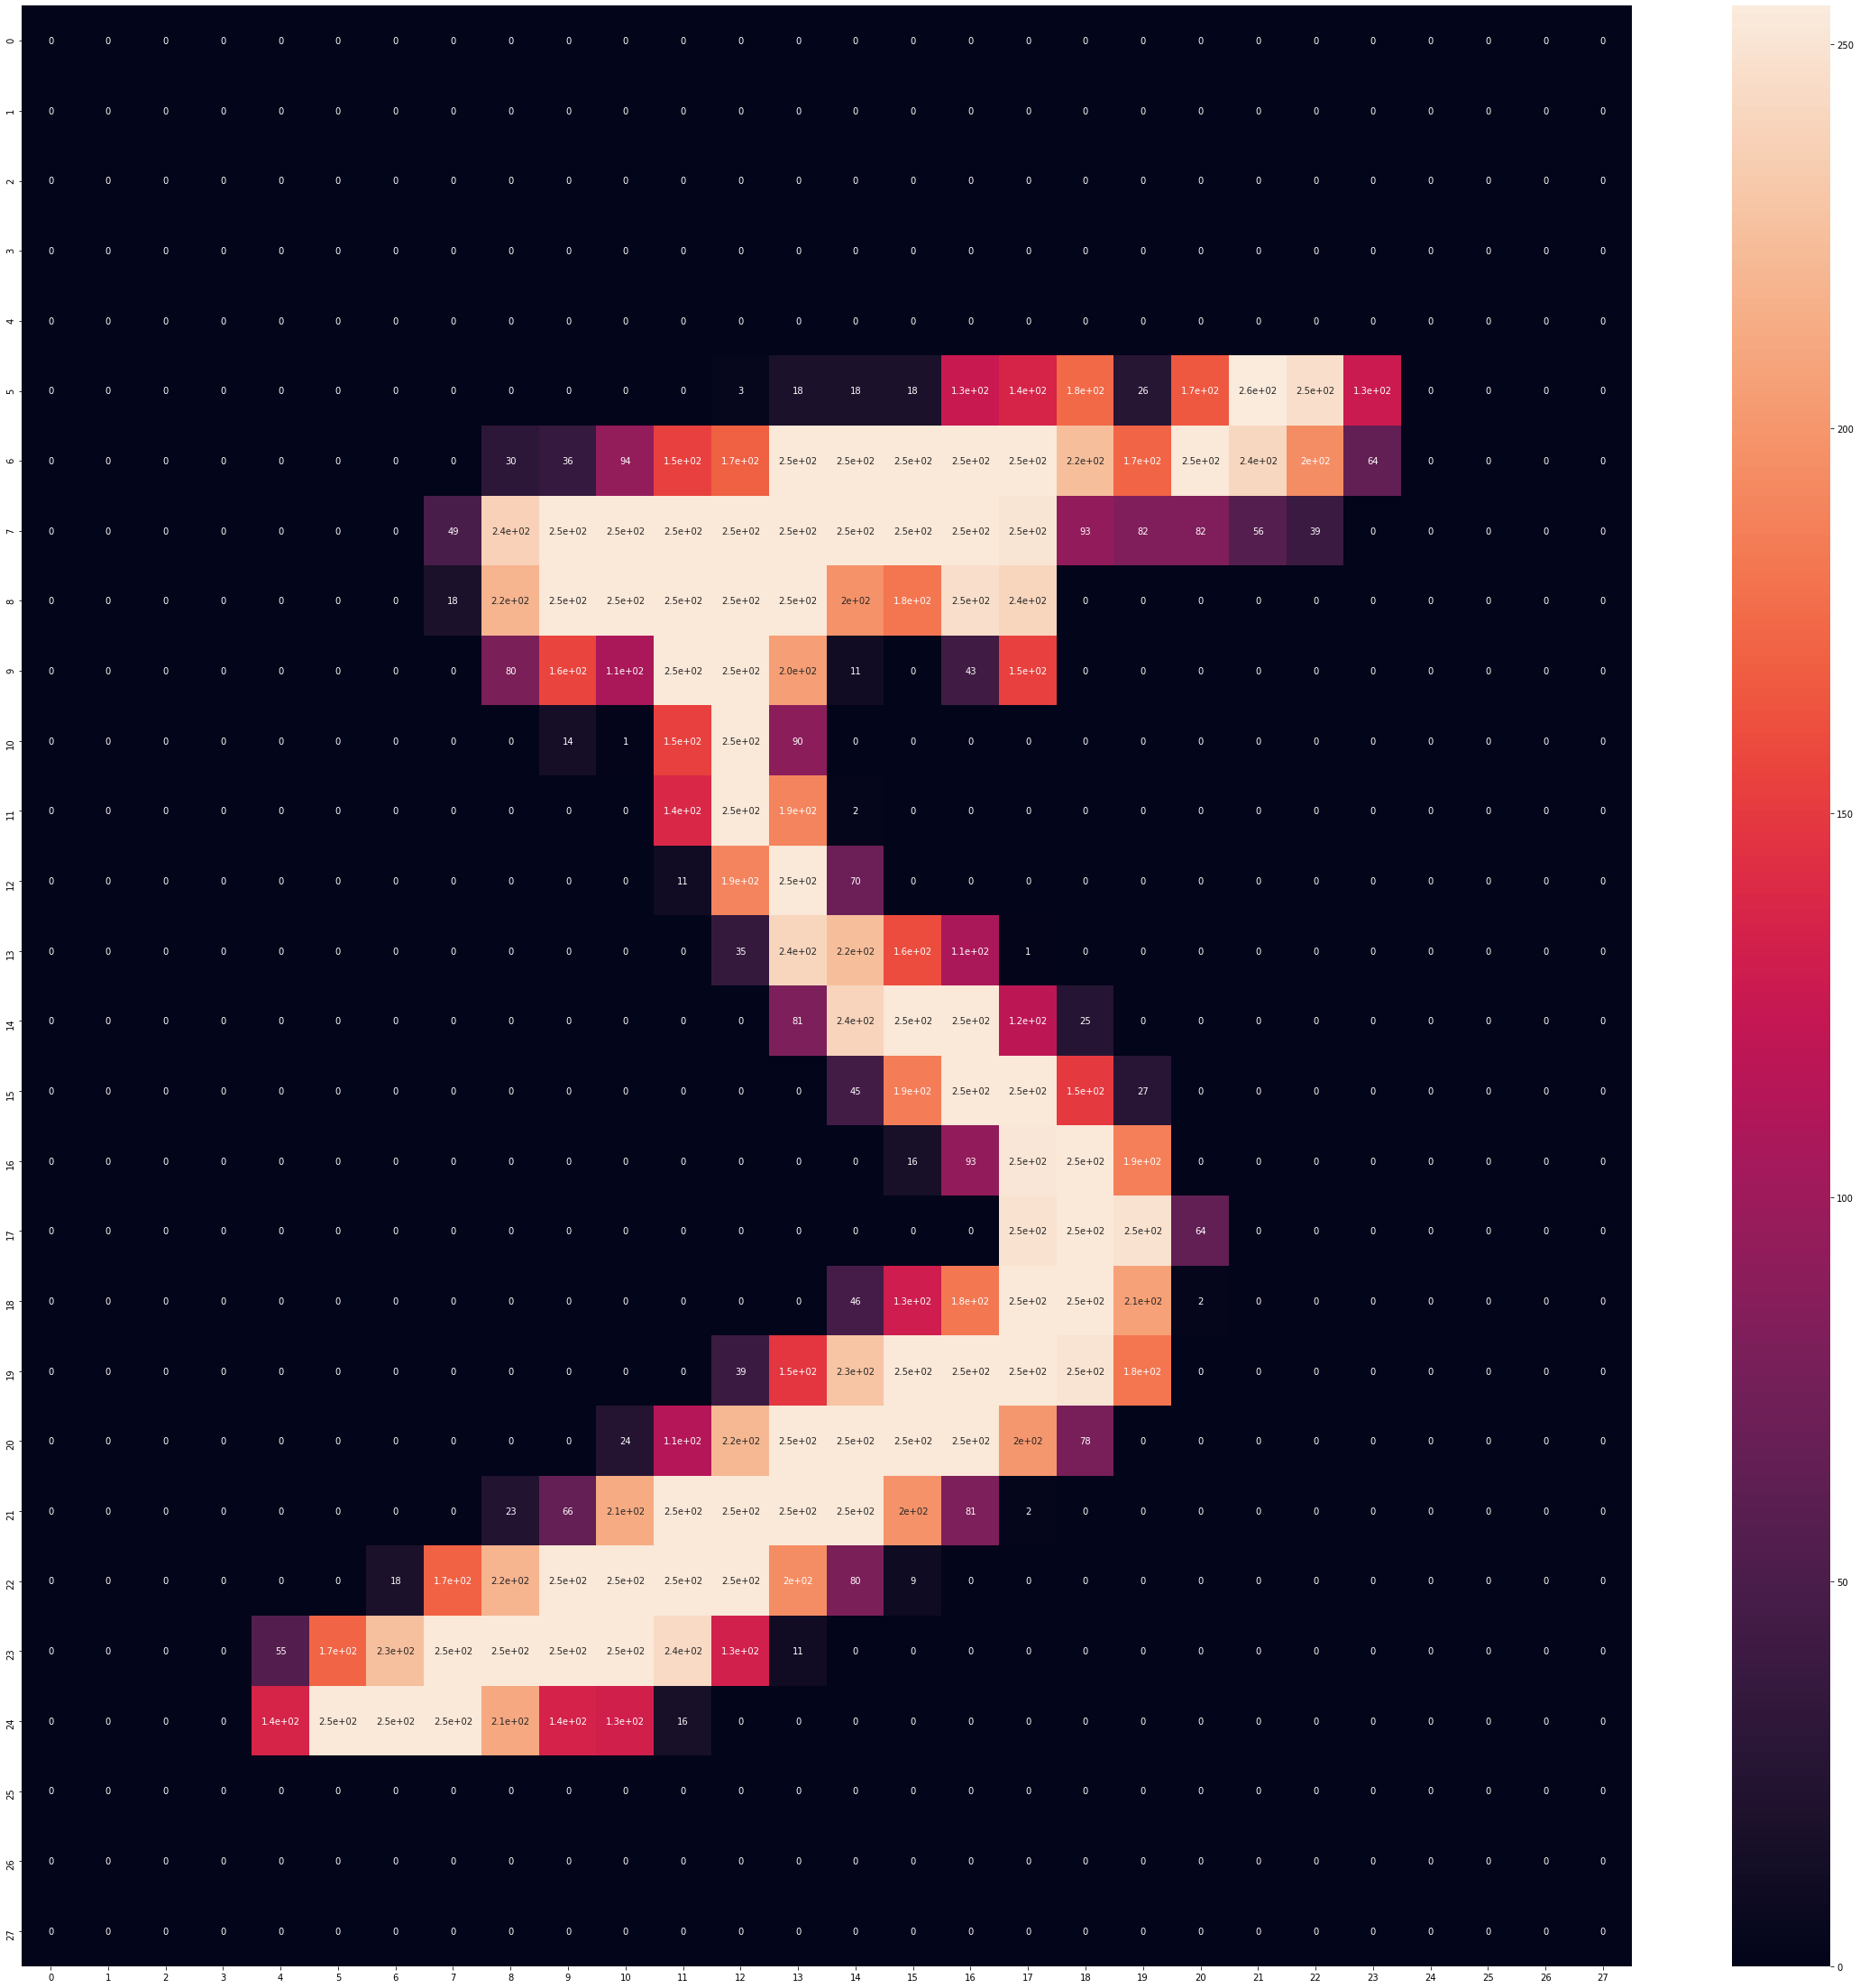

In [13]:
#pixel value visualization
plt.figure(figsize=(40,40))
sns.heatmap(x_train[0], annot = True)

<AxesSubplot:>

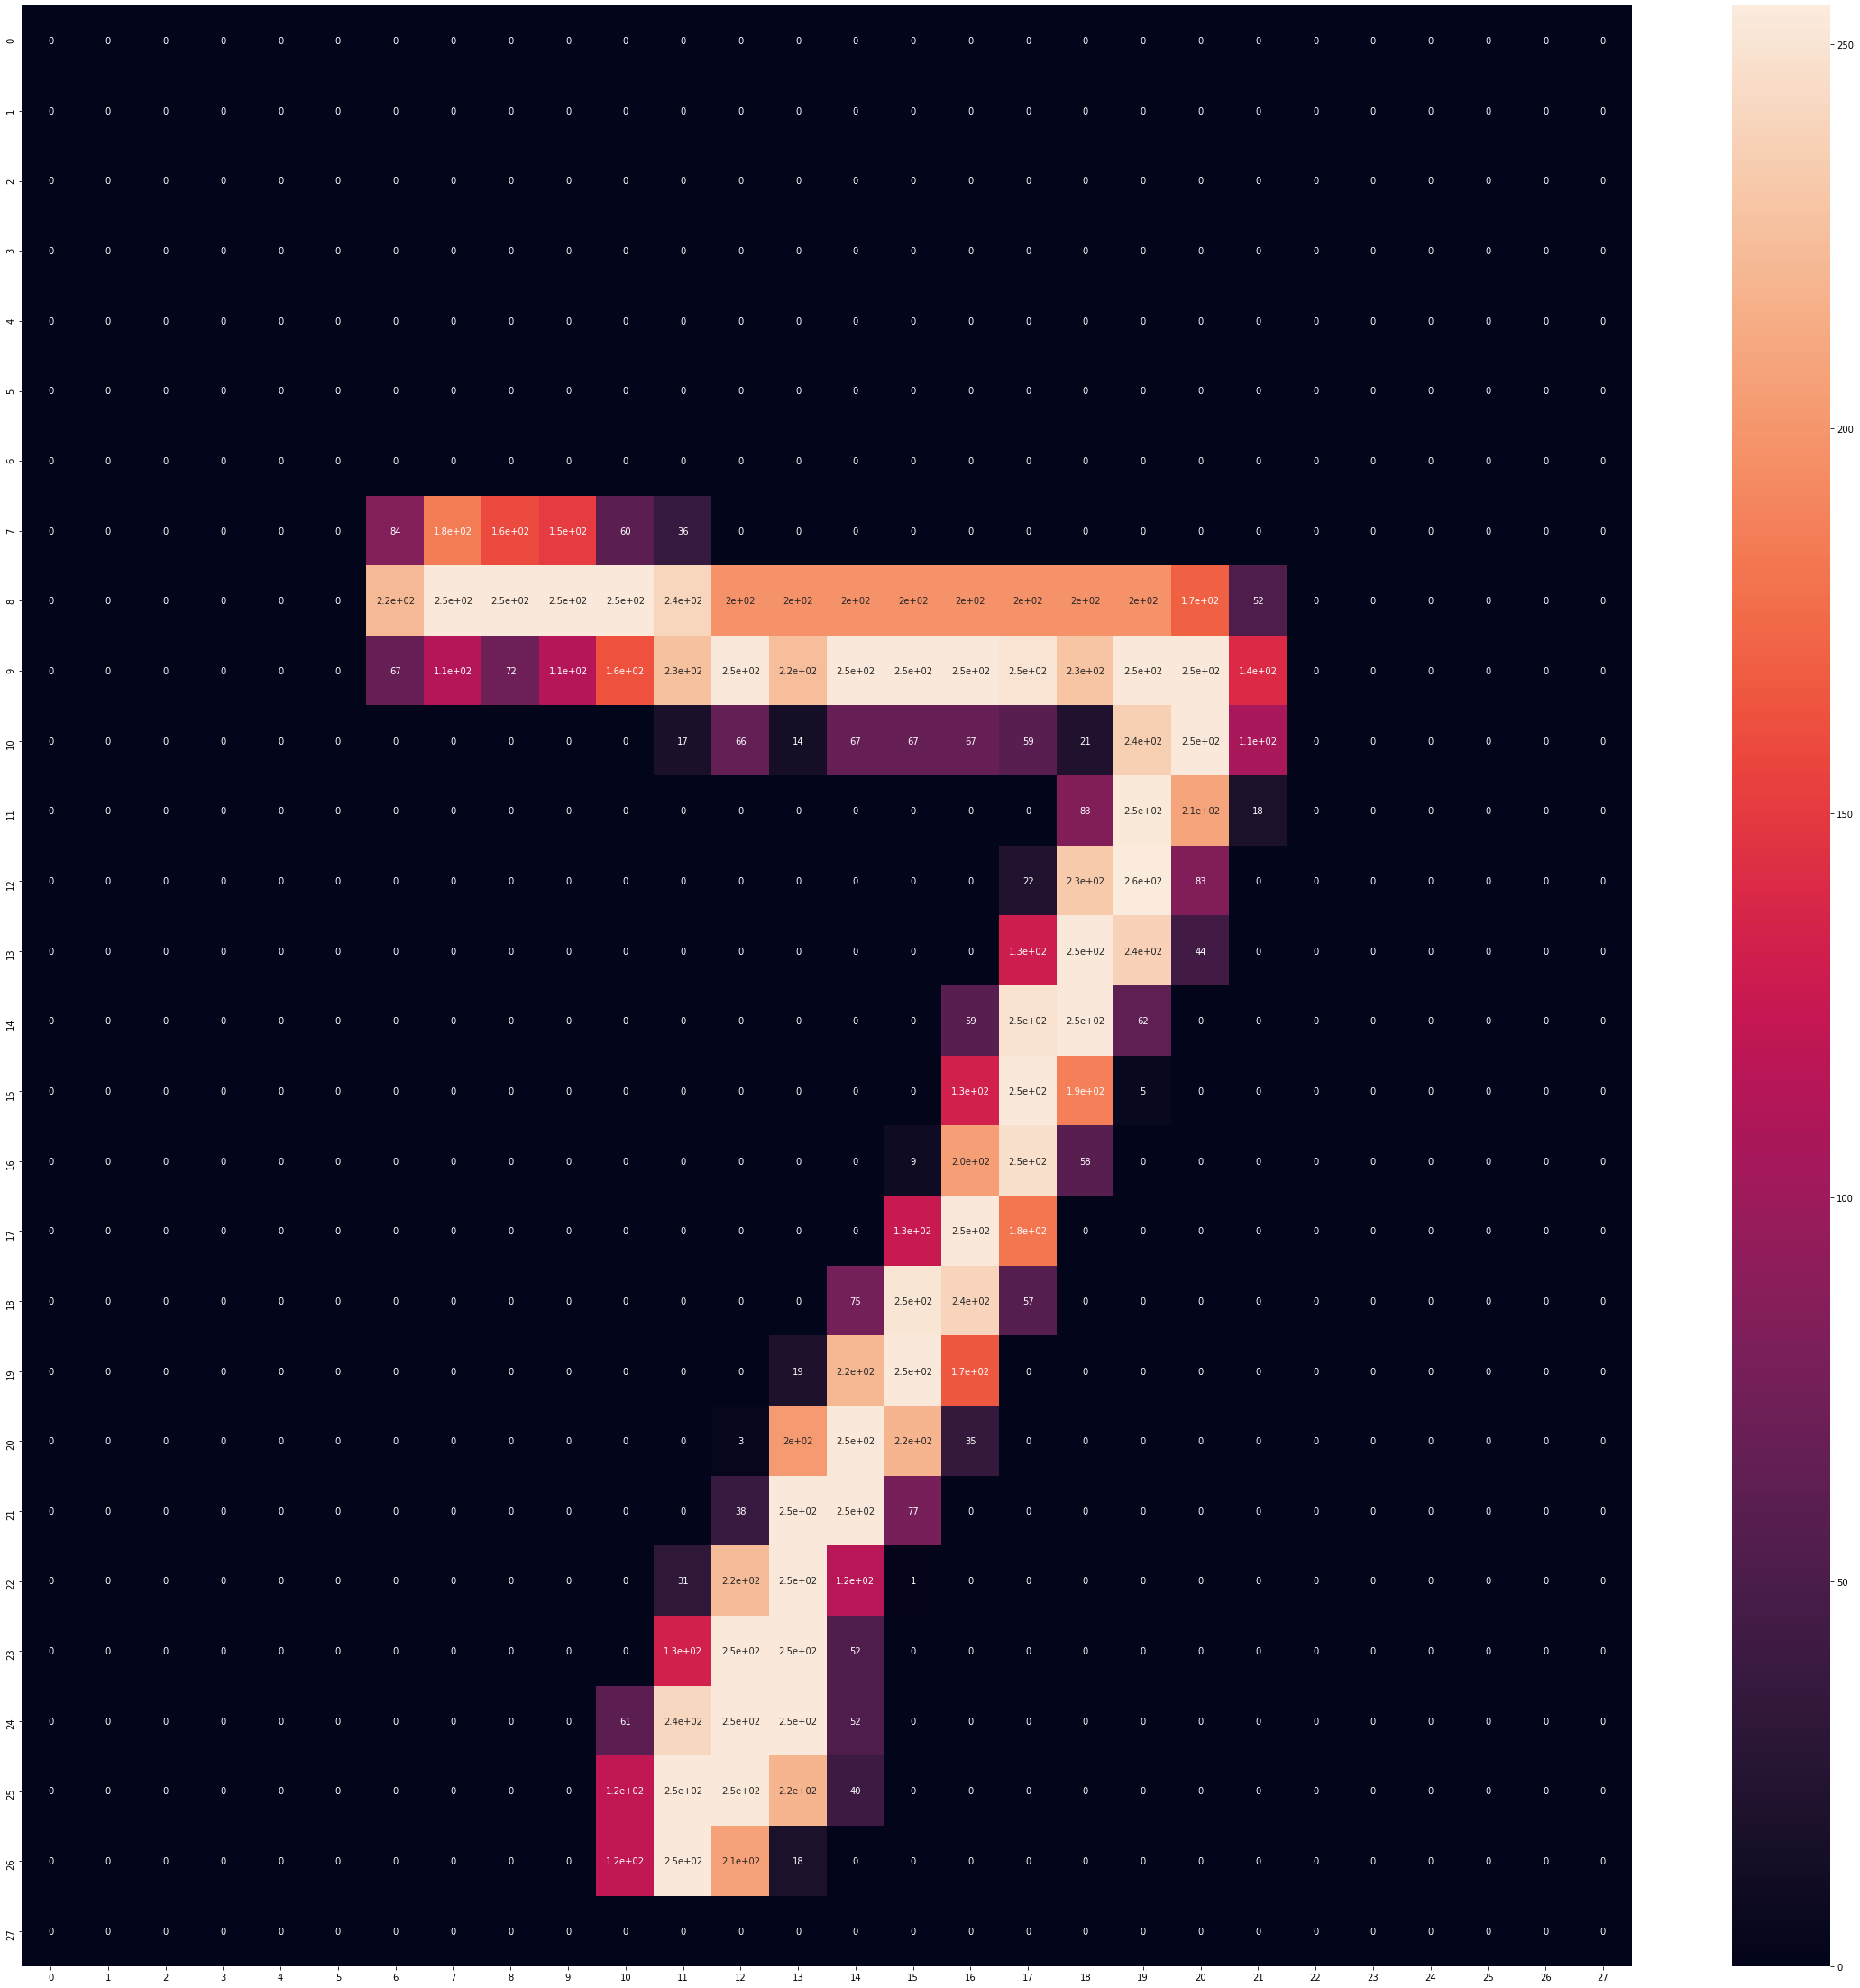

In [14]:
plt.figure(figsize=(40,40))
sns.heatmap(x_test[0], annot = True)

In [15]:
layers = [tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer"), 
         tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
         tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
         tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")]

In [16]:
clf = tf.keras.models.Sequential(layers)
# Two types of models sequenctial & functional(skip connection)

In [54]:
#Alternative
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
#model.add(tf.keras.layers.Dense(300, activation="relu"))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
#model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [17]:
clf.layers

In [18]:
clf.summary()
#784*300 + 300 + 300 * 100 + 100 + 100 * 10 + 10 = 266610 parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = clf.layers[1]

In [20]:
hidden1.get_weights() # weigth & bias matrix (randomly initialized)
# To set own weights hidden1.set_weights(hidden1.get_weights())

[array([[ 0.04090152,  0.06299824, -0.02940131, ...,  0.07160552,
          0.0725399 ,  0.02430597],
        [-0.00161037,  0.07047834,  0.06251436, ..., -0.02259382,
         -0.03724217, -0.07245585],
        [ 0.02752549,  0.03883599, -0.04137915, ...,  0.03750682,
          0.01968772, -0.04713932],
        ...,
        [ 0.02579965, -0.06071345, -0.05603166, ...,  0.00010061,
         -0.04728667,  0.01410075],
        [-0.01402651,  0.05415832,  0.05624203, ...,  0.02316562,
          0.00399318, -0.0727611 ],
        [-0.02161491,  0.00284948, -0.00034005, ..., -0.05876865,
         -0.02575891,  0.03506866]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [21]:
weight, biases = hidden1.get_weights()

In [22]:
weight.shape, biases.shape

((784, 300), (300,))

In [23]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # or use tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or tf.keras.optimizers.SGD(0.01)
METRICS = ['accuracy']

clf.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

In [24]:
x_train_.shape, 55000/32

((55000, 28, 28), 1718.75)

In [25]:
x_train_.shape, x_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [26]:
#bydefault batch size is 32 so model takes 1875 images at a time for training

## TesnsorBoard callback

In [57]:
def log_path(log_dir='logs/fit'):
    filename= time.strftime("log_%Y_%m_%d_%H_%M_%S") #h5 extension keras use to save model
    logpath = os.path.join(log_dir, filename)
    print(f'Saving logs at {logpath}')
    return logpath

log_dir = log_path()

Saving logs at logs/fit\log_2022_03_18_15_12_25


In [59]:
tf_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [60]:
EPOCH = 30
VALIDATION_SET = (x_valid, y_valid)

model = clf.fit(x_train_, y_train_, epochs = EPOCH, validation_data = VALIDATION_SET, batch_size= 32, callbacks=[tf_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9937 - val_loss: 0.0672 - val_accuracy: 0.9798
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9941 - val_loss: 0.0652 - val_accuracy: 0.9800
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0244 - accuracy: 0.9944 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9952 - val_loss: 0.0680 - val_accuracy: 0.9794
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9955 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9960 - val_loss: 0.0670 - val_accuracy: 0.9796
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0193 - accuracy: 0.9964 - val_loss: 0.0668 - val_accuracy:

In [61]:
%load_ext tensorboard

In [62]:
%tensorboard --logdir logs/fit

## Early stopping callbacks

In [66]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

## Model checkpointinng callback

In [73]:
 checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_ckpt.h5', save_best_only=True)

In [74]:
EPOCH = 1000
VALIDATION_SET = (x_valid, y_valid)

model = clf.fit(x_train_, y_train_, epochs = EPOCH, validation_data = VALIDATION_SET, batch_size= 32, callbacks=[tf_cb, early_stopping_cb, checkpoint_cb])

Epoch 1/1000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0677 - val_accuracy: 0.9824
Epoch 2/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.0684 - val_accuracy: 0.9814
Epoch 3/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9822
Epoch 4/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9820
Epoch 5/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9824
Epoch 6/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9826
Epoch 7/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0696 -

In [75]:
EPOCH = 1000
VALIDATION_SET = (x_valid, y_valid)

ckpt_model = tf.keras.models.load_model('model_ckpt.h5')

model = ckpt_model.fit(x_train_, y_train_, epochs = EPOCH, validation_data = VALIDATION_SET, batch_size= 32, callbacks=[tf_cb, early_stopping_cb, checkpoint_cb])

Epoch 1/1000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9820
Epoch 2/1000
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9824
Epoch 3/1000
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9820
Epoch 4/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9826
Epoch 5/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9828
Epoch 6/1000
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9824


In [33]:
def savemodel(directory):
    os.makedirs(directory, exist_ok = True)
    filename= time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5") #h5 extension keras use to save model
    modelpath = os.path.join(directory, filename)
    print(f'model {filename} will be saved here {modelpath}')
    return modelpath

In [34]:
model_path = savemodel("savedmodel")

model Model_2022_03_18_13_23_33_.h5 will be saved here savedmodel\Model_2022_03_18_13_23_33_.h5


In [35]:
tf.keras.models.save_model(clf, model_path)

In [36]:
model.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
pd.DataFrame(model.history)

,loss,accuracy,val_loss,val_accuracy
0,0.622995,0.840455,0.308591,0.9128
1,0.288593,0.917436,0.237469,0.9352
2,0.234282,0.933091,0.198523,0.9434
3,0.199113,0.942764,0.175239,0.9518
4,0.173588,0.950964,0.154718,0.9584
5,0.153507,0.955964,0.138684,0.9610
6,0.137883,0.960891,0.127414,0.9660
7,0.124562,0.964255,0.120488,0.9654
8,0.113777,0.967873,0.111190,0.9680
9,0.104220,0.970236,0.109703,0.9686


<AxesSubplot:>

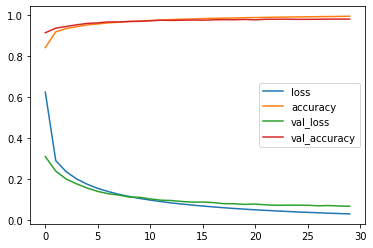

In [40]:
pd.DataFrame(model.history).plot()

In [42]:
clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9774


[0.07106819748878479, 0.977400004863739]

In [45]:
sample_test = x_test[:3]
y_prob = clf.predict(sample_test)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.   ]], dtype=float32)

In [47]:
ypred = np.argmax(y_prob, axis = -1)
ypred

array([7, 2, 1], dtype=int64)

In [49]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

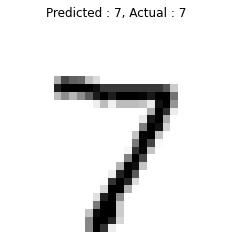

##############


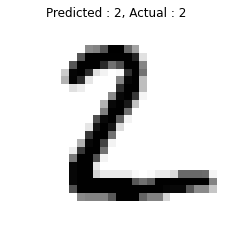

##############


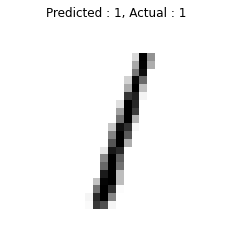

##############


In [51]:
for data, pred, actual in zip(sample_test, ypred, y_test_new):
    plt.imshow(data, cmap = "binary")
    plt.title(f'Predicted : {pred}, Actual : {actual}')
    plt.axis("off")
    
    plt.show()
    print('##############')

In [52]:
load_model = tf.keras.models.load_model(model_path)

In [53]:
load_model.evaluate(x_test, y_test) # 313 = 10000/32 selects random batch for 313 from test set for evaluation

313/313 [==============================] - 1s 1ms/step - loss: 0.0711 - accuracy: 0.9774


[0.07106819748878479, 0.977400004863739]

In [55]:
load_model.predict_classes(sample_test)

C:\Users\ayesha\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1], dtype=int64)